## 説明変数
- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- parch – タイタニックに同乗している親/子供の数
- ticket – チケット番号
- fare – 料金
- cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

データセットは下記

https://www.kaggle.com/c/titanic/data

## import & データの確認

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


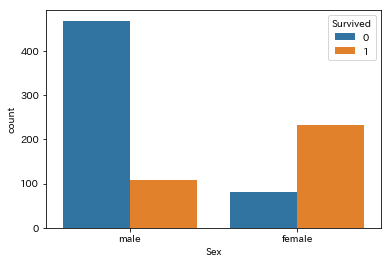

In [8]:
sns.countplot('Sex',hue='Survived',data=train)

女性の方が生き残っている

## 欠損値処理

dataframeの欠損データをisnull()で探して、カラム毎に返す関数kesson_table()を作って、 train と test のデータフレームの欠損を確認

In [9]:
def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns

kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [10]:
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [11]:
# 欠損値処理
# 料金と年齢は中央値で補完
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Age'] = train['Age'].fillna(train['Age'].median())
# 乗船港はSで補完
train['Embarked'] = train['Embarked'].fillna('S')

In [12]:
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [13]:
#カテゴリ変数の変換
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [14]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1


In [15]:
# testに関しても同様の処理を行う
#欠損値処理
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')
#カテゴリ変数の変換
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [16]:
train = train.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = train.drop('Survived', axis=1)
train_y = train.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [17]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
727,3,0,28.0,0,0,7.7375,2
92,1,1,46.0,1,0,61.1750,0
164,3,1,1.0,4,1,39.6875,0
196,3,1,28.0,0,0,7.7500,2
562,2,1,28.0,0,0,13.5000,0


In [18]:
print(train_X.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


## 決定木で予測

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# target = train["Survived"].values
# features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

In [21]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [22]:
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
# AUCと 正解率の表示
auc(fpr, tpr), accuracy_score(pred, test_y)

(0.7837689688996596, 0.7947761194029851)

## ランダムフォレストで予測

In [25]:
from sklearn.ensemble import RandomForestClassifier

# モデルの作成
clf_RF = RandomForestClassifier(random_state=0)
clf_RF = clf_RF.fit(train_X, train_y)

# 予測
pred_RF = clf_RF.predict(test_X)

In [26]:
pr, tpr, thresholds = roc_curve(test_y, pred_RF, pos_label=1)
# AUCと 正解率の表示
auc(fpr, tpr), accuracy_score(pred_RF, test_y)

(0.7654203450464486, 0.8022388059701493)